# Neural & Behavioral Modeling - Week 7 (Exercises)
by 李采蓉 b08207042@ntu.edu.tw

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 Simulate attentional effects on neurons (10 points)

Please read the following article:

Reynolds, J. H., & Desimone, R. (1999). <a href=https://www.salk.edu/wp-content/uploads/2015/11/rd.pdf>The role of neural mechanisms of attention in solving the binding problem.</a> Neuron, 24(1), 19-29.

and use its model equations in Fig. 10 to reproduce its Fig. 3a:<br>
<img src=https://www.researchgate.net/profile/Richard_Wezel/publication/224015518/figure/fig2/AS:213837023322122@1427994127491/When-presented-with-two-visual-stimuli-simultaneously-attention-can-lead-to-changes-in.png>

Note that the stimulus was presented from 0 to 200ms in the Fig. 3a.

---

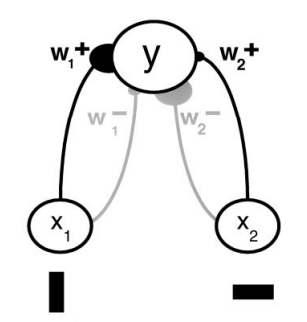

**公式**:<br>


$
\begin{aligned}
&E=x_1w_1^++x_2w_2^+\\
&I=x_1w_1^-+x_2w_2^-\\
&\dfrac{dy}{dt}=(B-y)E-yI-Ay\\
&\lim_{t\rightarrow\infty}y=\dfrac{BE}{E+I+A}
\end{aligned}
$

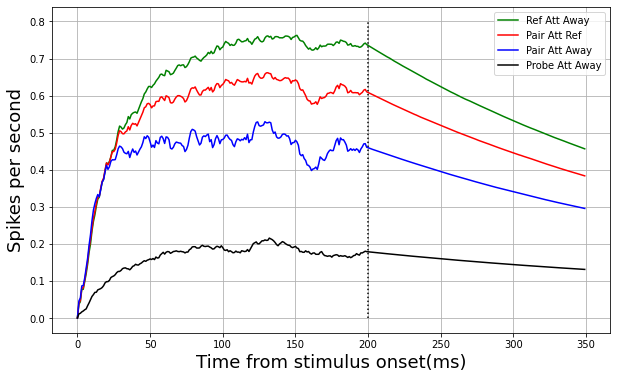

In [2]:
### Write your codes here
from numpy import random

# constant
###########
B, A = 1, 0.2
###########

y_g=zeros(350)
y_g[0]=0
y_r=zeros(350)
y_r[0]=0
y_b=zeros(350)
y_b[0]=0
y_x=zeros(350)
y_x[0]=0

def weight():
    w_1add, w_1minus = 5*(random.uniform(0, 1)+random.uniform(-0.1, 0.1)), random.uniform(0, 1)+random.uniform(-0.1, 0.1)
    w_2add, w_2minus = random.uniform(0, 1)+random.uniform(-0.1, 0.1), 5*(random.uniform(0, 1)+random.uniform(-0.1, 0.1))
    return (w_1add, w_1minus, w_2add, w_2minus)

def EandI(x1, x2):
    E = x1*w_1add+x2*w_2add
    I = x1*w_1minus+x2*w_2minus
    return (E, I)

def diff(y, B, E, I, A):
    res = y+0.01*((B-y)*E-y*I-A*y)
    return res    

for t in range(1,200):
    w_1add, w_1minus, w_2add, w_2minus = weight()
    # green: x1 only
    x_1 = random.normal(loc=0.90, scale=0.05)
    x_2 = random.normal(loc=0.05, scale=0.01)
    E, I = EandI(x_1, x_2)
    y_g[t] = diff(y_g[t-1], B, E, I, A)
    # red: x1>x2
    x_1 = random.normal(loc=0.90, scale=0.05)
    x_2 = random.normal(loc=0.30, scale=0.05)
    E, I = EandI(x_1, x_2)
    y_r[t] = diff(y_r[t-1], B, E, I, A)
    # blue: x1=x2
    x_1 = random.normal(loc=0.90, scale=0.05)
    x_2 = random.normal(loc=0.90, scale=0.05)
    E, I = EandI(x_1, x_2)
    y_b[t] = diff(y_b[t-1], B, E, I, A)
    # black: x2 only
    x_1 = random.normal(loc=0.05, scale=0.01)
    x_2 = random.normal(loc=0.90, scale=0.05)
    E, I = EandI(x_1, x_2)
    y_x[t] = diff(y_x[t-1], B, E, I, A)
    
for t in range(200,350):
    # green: x1 only
    x_1 = random.normal(loc=0.05, scale=0.01)
    x_2 = random.normal(loc=0.05, scale=0.01)
    E, I = EandI(x_1, x_2)
    y_g[t] = diff(y_g[t-1], B, E, I, A)
    # red: x1>x2
    x_1 = random.normal(loc=0.05, scale=0.01)
    x_2 = random.normal(loc=0.05, scale=0.01)
    E, I = EandI(x_1, x_2)
    y_r[t] = diff(y_r[t-1], B, E, I, A)
    # blue: x1=x2
    x_1 = random.normal(loc=0.05, scale=0.01)
    x_2 = random.normal(loc=0.05, scale=0.01)
    E, I = EandI(x_1, x_2)
    y_b[t] = diff(y_b[t-1], B, E, I, A)
    # black: x2 only
    x_1 = random.normal(loc=0.05, scale=0.01)
    x_2 = random.normal(loc=0.05, scale=0.01)
    E, I = EandI(x_1, x_2)
    y_x[t] = diff(y_x[t-1], B, E, I, A)
    
figure(figsize=(10, 6))
xlabel("Time from stimulus onset(ms)", fontsize=18)
ylabel("Spikes per second", fontsize=18)
vlines(200, 0, 0.8, linestyle=':', color='black')
grid()
plot(y_g, color='green', label='Ref Att Away')
plot(y_r, color='red', label='Pair Att Ref')
plot(y_b, color='blue', label='Pair Att Away')
plot(y_x, color='black', label='Probe Att Away')
legend()
show()

**思路**:<br>
在原文的圖片解釋中有提及另一篇同作者的文章(Competitive Mechanisms Subserve Attention in Macaque Areas V2 and V4)，內文有對參數做詳細的交代，故我先按其參數的規則做設定
1) B=1, A=0.2<br>
2) 興奮與抑制的權重為uniform(0,1)，同時為了模擬隨機性，會再從uniform中選出$\pm 10\%$隨機noise加到細胞反應。<br>
3) 注意力取決於興奮性或抑制性權重乘5。<br>

觀察原文所得實驗數據(Reynolds et al. (1999))，首先得出的是四種實驗刺激下注意力趨勢的相似程度，例如刺激出現時集體出現較大的spike、綠線和紅線的相似程度高於藍線、藍線更容易受到$x_2$抑制影響...等等，在原文所提及的基礎在做$x_1$和$x_2$數值的細修。其實在原文實驗數據中我們可以看出，當只出現一樣特定刺激時(僅有直的長方形或橫的長方形)，多多少少還是會受到另一群不偏好該圖形細胞的影響，所以在兩個$x$的方面我並不會設成0，還是會設一個微小的數值些微的調整。除此之外，紅線與綠線的相似程度高於紅線與藍線，因此數值設定上會把紅線的$x_2$調小一點。<br>

**公式解析:**<br>
$$
\dfrac{dy}{dt}=(B-y)E-yI-Ay
$$
這條式子可以拆成幾個部分，第一個$(B-y)*E$約束了興奮性輸入的大小，使其最大值坐落在$B$，$y$趨近$B$，其增長幅度便會越來越小；第二部分$-y*I$則為抑制性輸入，假若$I$為正，整個式子會往正向反彈；第三部分則為被動衰減項$-A*y$，無論如何都會保持一定的步調衰減。